In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\dlewis2\Netflix Data.csv')

### Explore data

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
df.shape

(8807, 12)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df.nunique() #shows number of unique rows per field

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [11]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [80]:
#for cols in df.columns:
    #print(cols, df[cols].unique(),'\n')

In [15]:
df['date_added']=pd.to_datetime(df['date_added']) #change date_added from string to date format

In [16]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [18]:
df['Year_added']=pd.DatetimeIndex(df['date_added']).year

In [19]:
df['Month_added']=pd.DatetimeIndex(df['date_added']).month

<AxesSubplot:xlabel='date_added', ylabel='Count'>

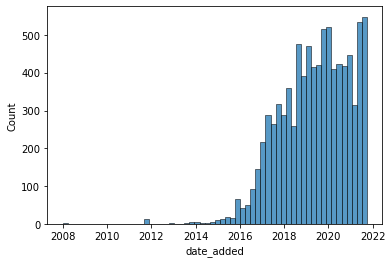

In [21]:
sns.histplot(data=df, x='date_added')


### Find actor who is in most Netflix content in US

In [25]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Year_added        10
Month_added       10
dtype: int64

In [26]:
country_us = df.loc[(~df['country'].isnull())&(df['country'].str.contains('United States'))]

clean_cast = country_us.loc[~country_us['cast'].isnull()]

clean_cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,2021.0,9.0
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021.0,9.0
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,2021.0,9.0


In [27]:
from collections import Counter
cast_counter = Counter()

In [28]:
clean_cast_df = clean_cast['cast']
clean_cast_df.head()

7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
15    Logan Browning, Brandon P. Bell, DeRon Horton,...
27    Adam Sandler, Kevin James, Chris Rock, David S...
28    Keri Russell, Josh Hamilton, J.K. Simmons, Dak...
Name: cast, dtype: object

In [29]:
for item in clean_cast_df:
    cast_counter.update(item.split(','))

In [30]:
actor=[]
NFLX_actor_count=[]

for item in cast_counter.most_common(20):
    actor.append(item[0])
    NFLX_actor_count.append(item[1])

In [31]:
DFCommonActor = {'Actor':actor,'Appearances':NFLX_actor_count}
DFCommonActor = pd.DataFrame(DFCommonActor)


<AxesSubplot:title={'center':'Actors by Netflix Appearance\n Top 20'}, xlabel='Actor', ylabel='Appearances'>

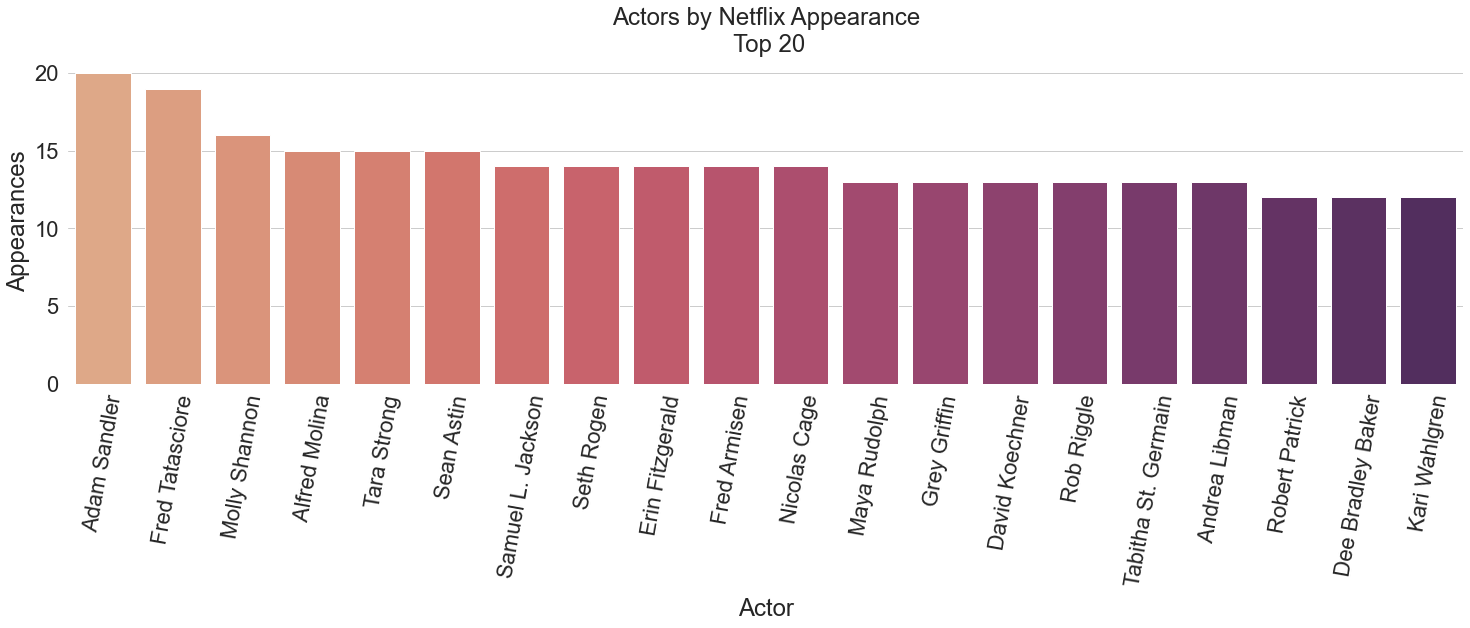

In [88]:
plt.figure(figsize=(25,6))
sns.set_style("whitegrid")
Actor_bar =sns.barplot(data=DFCommonActor,x='Actor',y='Appearances', palette = 'flare')
Actor_bar.set_xticklabels(Actor_bar.get_xticklabels(),rotation = 80)
Actor_bar.set_title('Actors by Netflix Appearance\n Top 20')
sns.set(font_scale=2)
sns.despine(top=True, bottom=True, right=True, left=True)
Actor_bar

For movies/shows release in United State, Adam Sandler appears in the most of them with 20.  Not too surprising with the amount of movies put out recently after his Netflix deal.  Fred Tatasciore is close behind Adam Sandler.  Never heard of him, but it makes sense with further research; he's a voice actor.  Molly Shannon is the highest woman and Samuel L. Jackson is the highest black actor. 

### Which movie/TV genres are the most popular on Netflix worldwide

In [91]:
genreDF = df['listed_in']
genreDF.head()

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

In [92]:
genre_counter = Counter()

In [93]:
for item in genreDF:
    genre_counter.update(item.split(','))

In [94]:
genre=[]
genre_count=[]

In [95]:
for item in genre_counter.most_common(100):
    genre.append(item[0])
    genre_count.append(item[1])

In [99]:
DF_genre = {'Genre':genre,'Genre_Count':genre_count}
DF_genre = pd.DataFrame(DF_genre)
DF_genre


,Genre,Genre_Count
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829
...,...,...
68,Romantic Movies,3
69,Spanish-Language TV Shows,2
70,LGBTQ Movies,1
71,TV Sci-Fi & Fantasy,1


In [100]:
DF_genre[DF_genre.duplicated(['Genre'])] #no duplicates show under Genre

,Genre,Genre_Count


In [101]:
DF_genre['Genre'].value_counts() #there are some duplicates because of some extra spaces (Horror Movies is an example)

Dramas                1
Anime Features        1
 Horror Movies        1
 TV Comedies          1
 Music & Musicals     1
                     ..
 Classic & Cult TV    1
 Crime TV Shows       1
TV Dramas             1
Horror Movies         1
Sports Movies         1
Name: Genre, Length: 73, dtype: int64

In [110]:
DF_genre['Genre']=DF_genre['Genre'].str.strip() #Strips out the spaces and now the value counts shows 2 entries for the duplicates
DF_genre['Genre'].value_counts()

TV Horror                       2
Documentaries                   2
Independent Movies              2
LGBTQ Movies                    2
TV Comedies                     2
Kids' TV                        2
Sports Movies                   2
Horror Movies                   2
Music & Musicals                2
Classic Movies                  2
Children & Family Movies        2
Crime TV Shows                  2
Sci-Fi & Fantasy                2
Spanish-Language TV Shows       2
Romantic TV Shows               2
International TV Shows          2
TV Action & Adventure           2
Reality TV                      2
Classic & Cult TV               2
Thrillers                       2
Anime Features                  2
Dramas                          2
International Movies            2
Stand-Up Comedy & Talk Shows    2
Comedies                        2
Cult Movies                     2
TV Dramas                       2
Docuseries                      2
TV Sci-Fi & Fantasy             2
Romantic Movie

In [121]:
DF_genre = DF_genre.groupby('Genre').sum().reset_index() #groups the duplicates together and sums them up in a new dataframe
DF_genre = DF_genre.sort_values('Genre_Count', ascending=False)
DF_genre.head()

,Genre,Genre_Count
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869


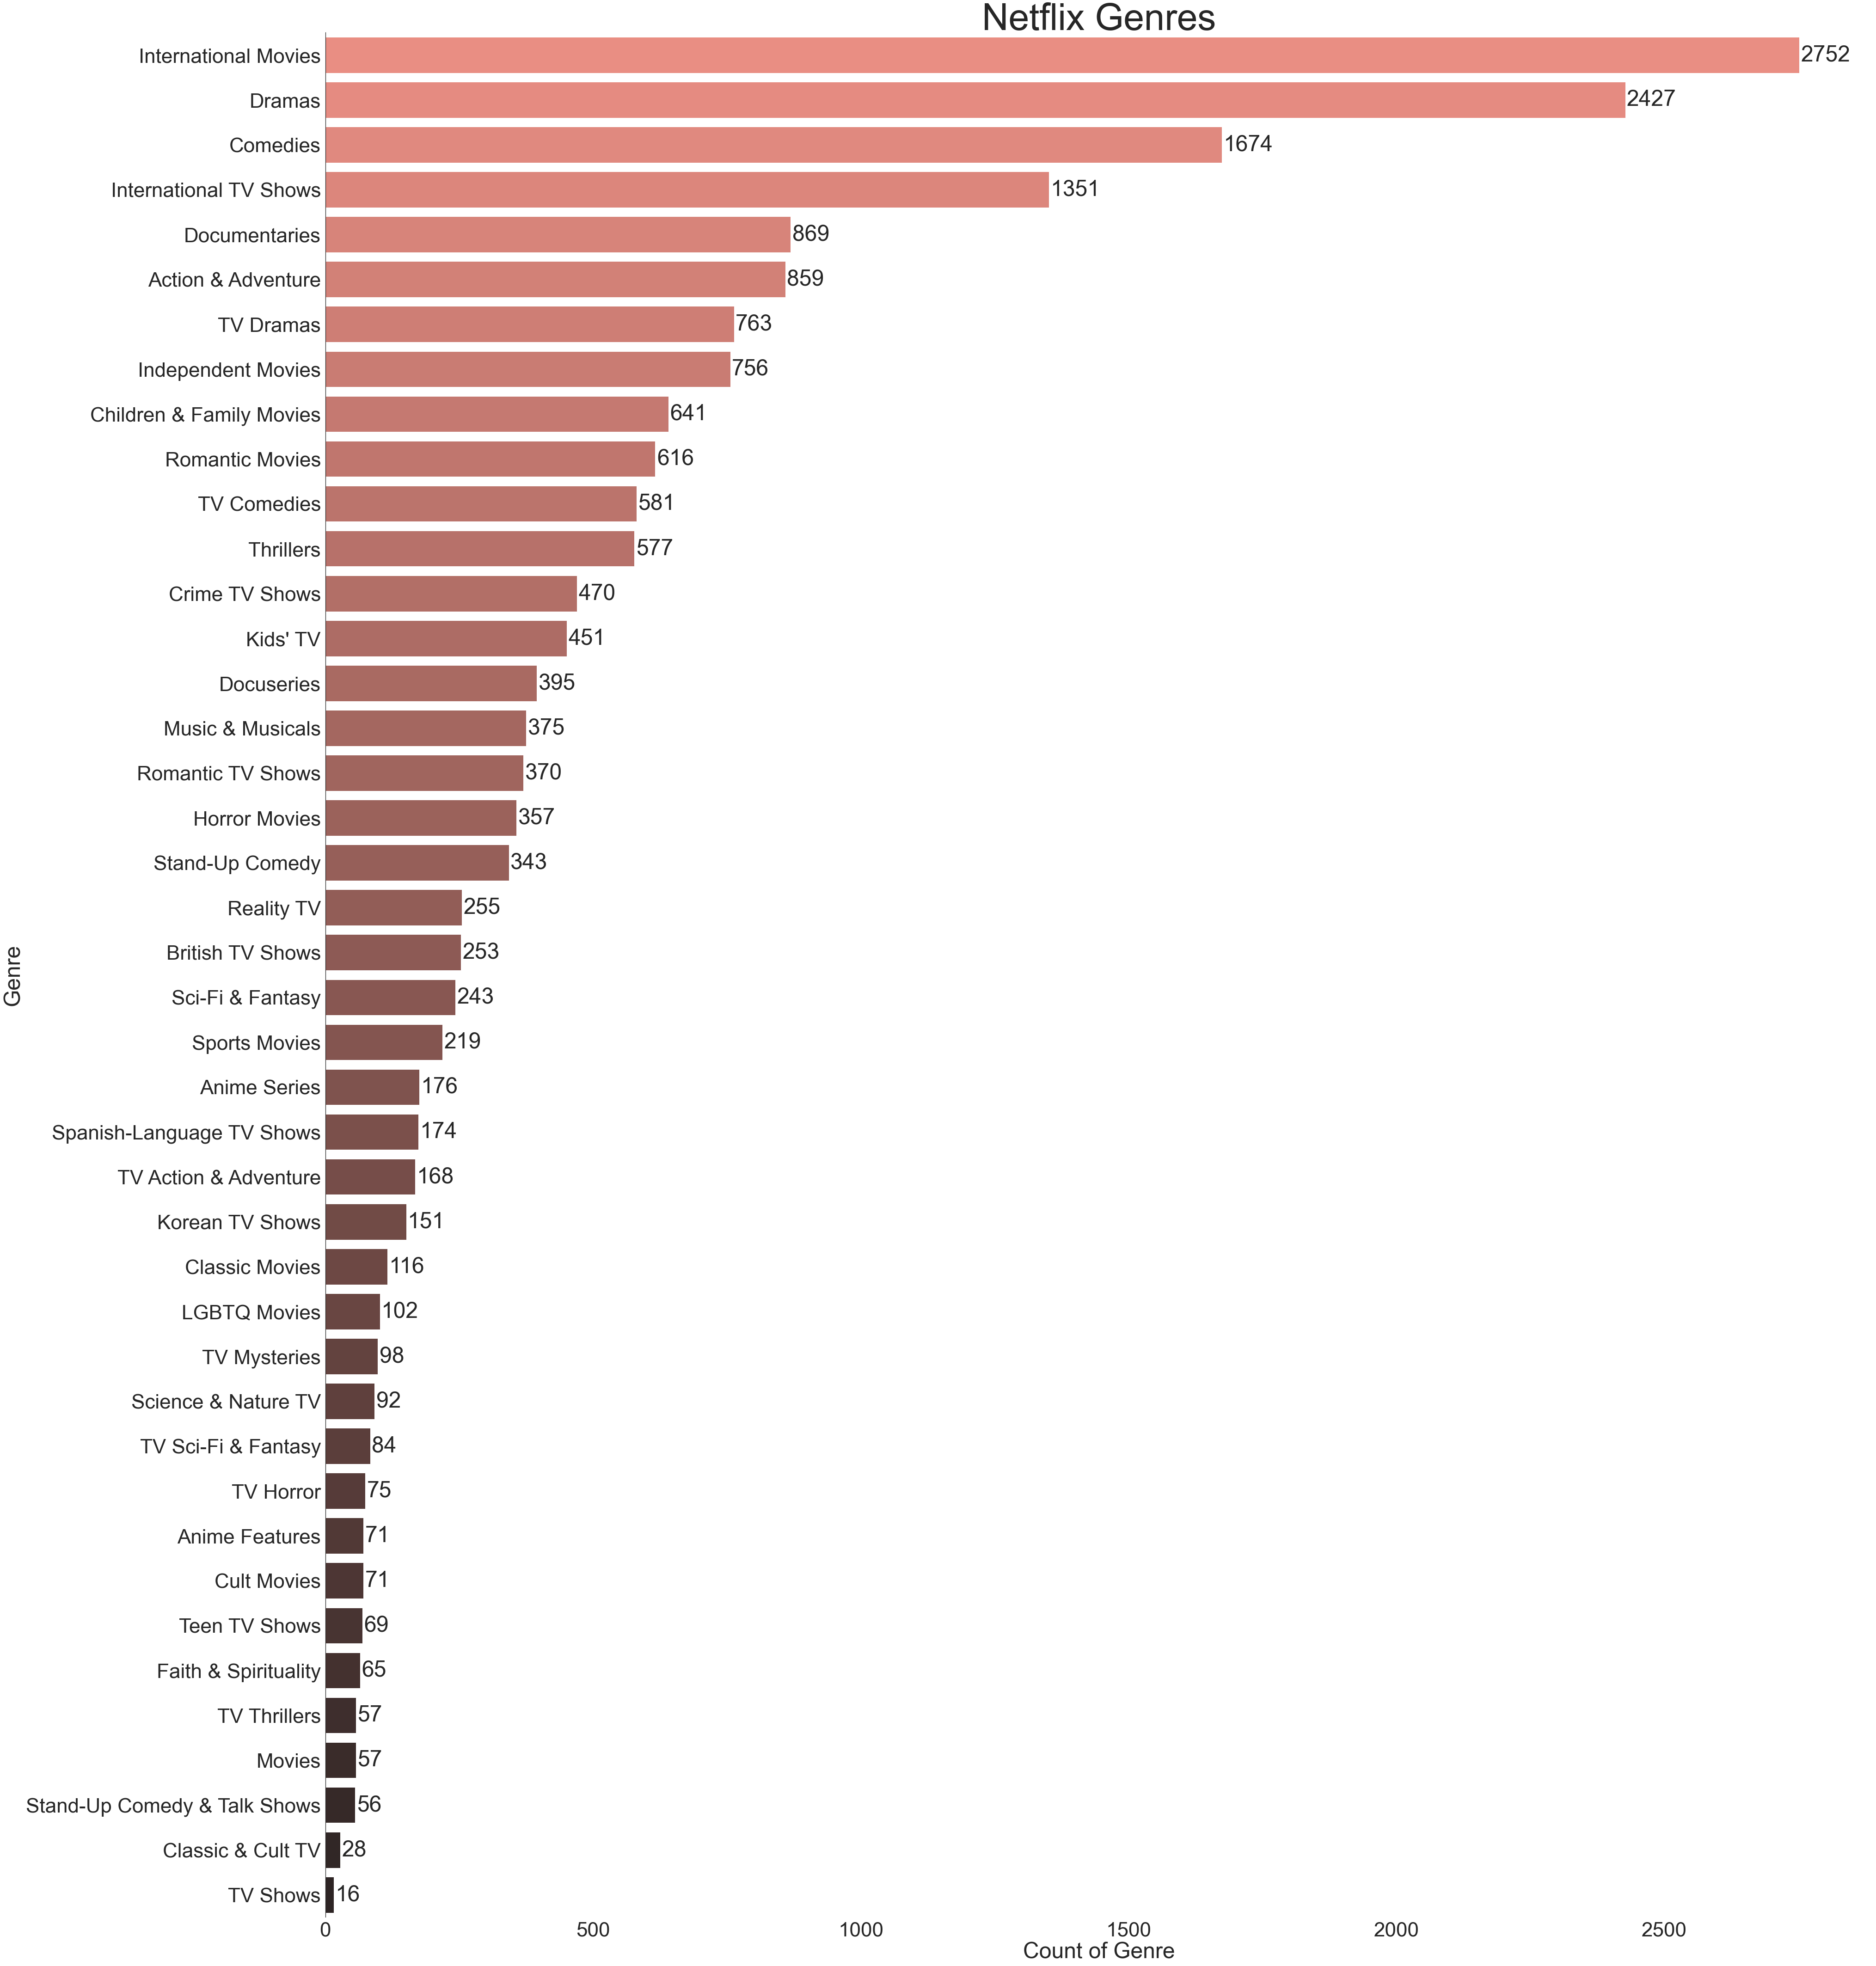

In [124]:
plt.figure(figsize=(60,75))
sns.set_style("white")
genre_bar =sns.barplot(data=DF_genre,x='Genre_Count',y='Genre', palette = 'dark:salmon_r')
genre_bar.set_title('Netflix Genres', fontsize = 80)
genre_bar.set_xlabel('Count of Genre')
genre_bar.set_ylabel('Genre')
sns.despine(top=True, bottom=True, right=True)
sns.set(font_scale=4)
genre_bar

#puts data labels for each bar
for p in genre_bar.patches:
    height=p.get_height()
    width=p.get_width()
    genre_bar.text(x=width+3, y=p.get_y()+(height/2), s = '{:.0f}'.format(width),va='center')

To no surprise, international movies takes the top spot on Netflix with 2752 entries.  International movies seem to be more prevalent these days whenever looking at the new releases.  Goes hand in hand with Netflix being an international median giant.  

### Breakdown of ratings for all movies/shows

In [40]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


In [41]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Year_added        10
Month_added       10
dtype: int64

In [42]:
TVShow = df.loc[(df['type']=='TV Show')]

In [43]:
Movie = df.loc[(df['type']=='Movie')]

In [44]:
TVShow['rating'].value_counts()

TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

In [45]:
Movie['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
66 min         1
74 min         1
84 min         1
Name: rating, dtype: int64

In [46]:
Movie = Movie.loc[~Movie['rating'].isin(['74 min','84 min','66 min'])] #remove the ratings that show times instead of actual rating

In [47]:
Movie['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
UR             3
NC-17          3
Name: rating, dtype: int64

In [48]:
#turn above Movie value counts into dataframe
MovieDF = Movie['rating'].value_counts().to_frame().reset_index().rename(columns = {'index':'Rating','rating':'Num of Rating'}) 
MovieDF

,Rating,Num of Rating
0,TV-MA,2062
1,TV-14,1427
2,R,797
3,TV-PG,540
4,PG-13,490
5,PG,287
6,TV-Y7,139
7,TV-Y,131
8,TV-G,126
9,NR,75


In [50]:
 #turn above TVShow value counts into dataframe
TVShowDF = TVShow['rating'].value_counts().to_frame().reset_index().rename(columns = {'index':'Rating','rating':'Num of Rating'}) 

In [77]:
def pie(type):
    PieData = type['Num of Rating']
    PieLabels = type['Rating']
    colors = sns.color_palette('rocket')
    explode = [0.02]*(len(type['Rating'].unique()))  ##WORK ON THIS FOR THE FUNCTION USING TV AND MOVIES

    plt.figure(figsize=(12,8)) #15,10
    plt.pie(PieData, colors= colors, autopct = lambda p: format(p, '.0f')+'%' if p>1 else None, #only shows the percentages above 1
            textprops = {'color':'white','fontsize':15}, shadow=True, pctdistance=0.85, explode=explode)

    #draw white cirlce in middle
    center_circle = plt.Circle((0,0),0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    plt.legend(PieLabels,fontsize=20,bbox_to_anchor=(1,0.8),loc='upper right',bbox_transform=plt.gcf().transFigure, 
               title='Netflix Ratings', title_fontsize=20 )
    
    plt.title('Netflix Ratings', fontsize=25, color='r', fontname='Comic Sans MS')
    plt.show()

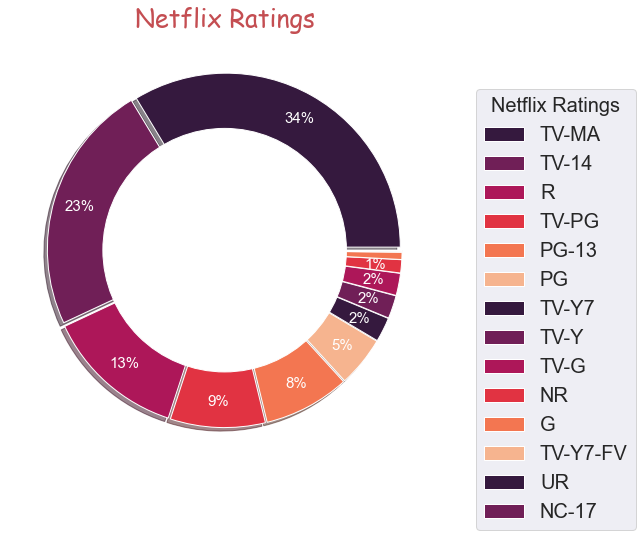

In [78]:
pie(MovieDF) 

Above chart shows percentage of movies on Netflix that have certain ratings.  Almost half of movies on Netflix are TV-MA or R.  

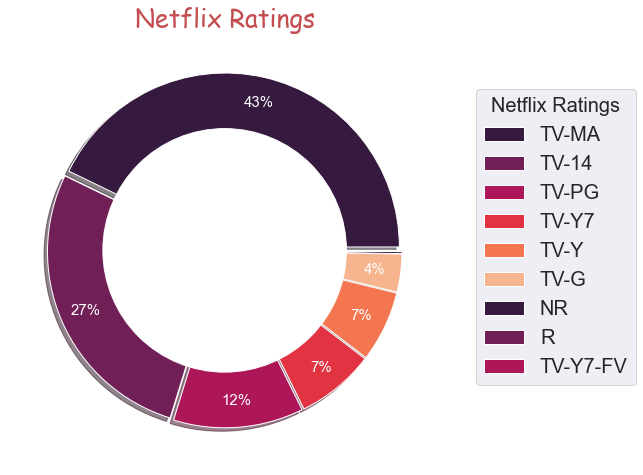

In [79]:
pie(TVShowDF)

Netflix TV shows have a large portion of TV-MA material as well.  Good to know if you're a parent of a young kid worried about their viewing habits.  Disney+ might be the way to go if you can't make sure they are limited to certain movies/shows on Netflix.  